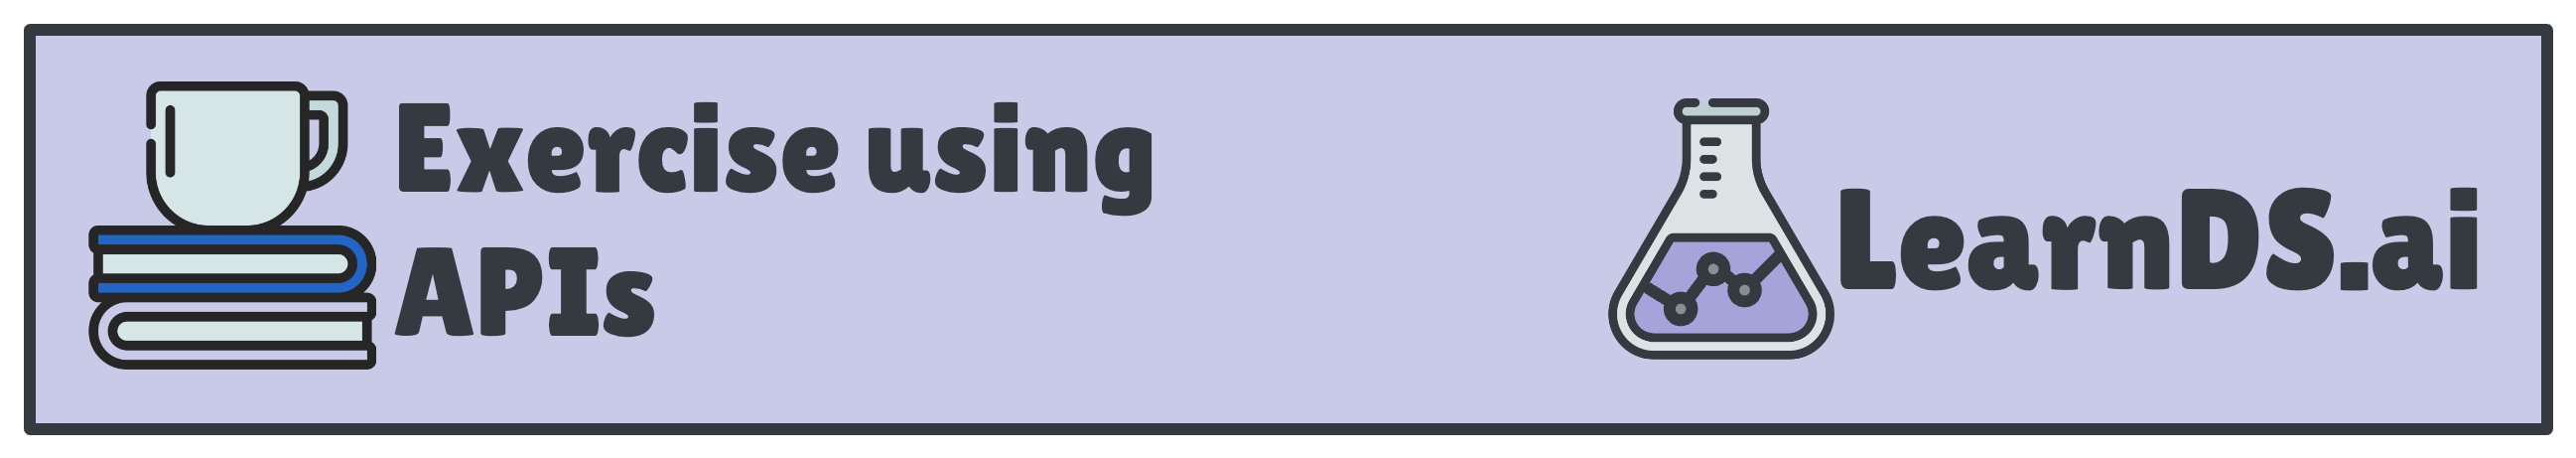

# Collecting Real-Time Data with APIs
**A Hands-On Guide Using Python**

In this Jupyter Notebook by [LearnDS.ai](https://www.learndatascience.ai), I’ll break down the essentials of using APIs for:
- Data collection
- Why they matter
- How they work
- How to get started with them in Python.



To perform the following hands-on, the following libraries should be installed:

In [ ]:
!pip install requests pandas


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


# BRIEF INTRODUCTION: What is an API?
*An API (Application Programming Interface) is a set of rules and protocols that allow different software systems to communicate and share data with each other.*

APIs define how requests and responses should be formatted so that one program can interact with another seamlessly, even if they are built on different technologies.

When using an API, interactions typically involve the following components:

- **Client:** The application or system that sends a request to access data or functionality.
- **Request:** The client sends a structured request to the server, specifying what data or service it needs.
- **Server:** The system that processes the request and provides the requested data or performs an action.
- **Response:** The server processes the request and sends back the data or result in a structured format, usually JSON or XML.
- **Endpoint (URL):** It is a dedicated URL that provides access to a specific resource.

This communication allows applications to share information or functionalities efficiently, enabling tasks like fetching data from a database or interacting with third-party services.

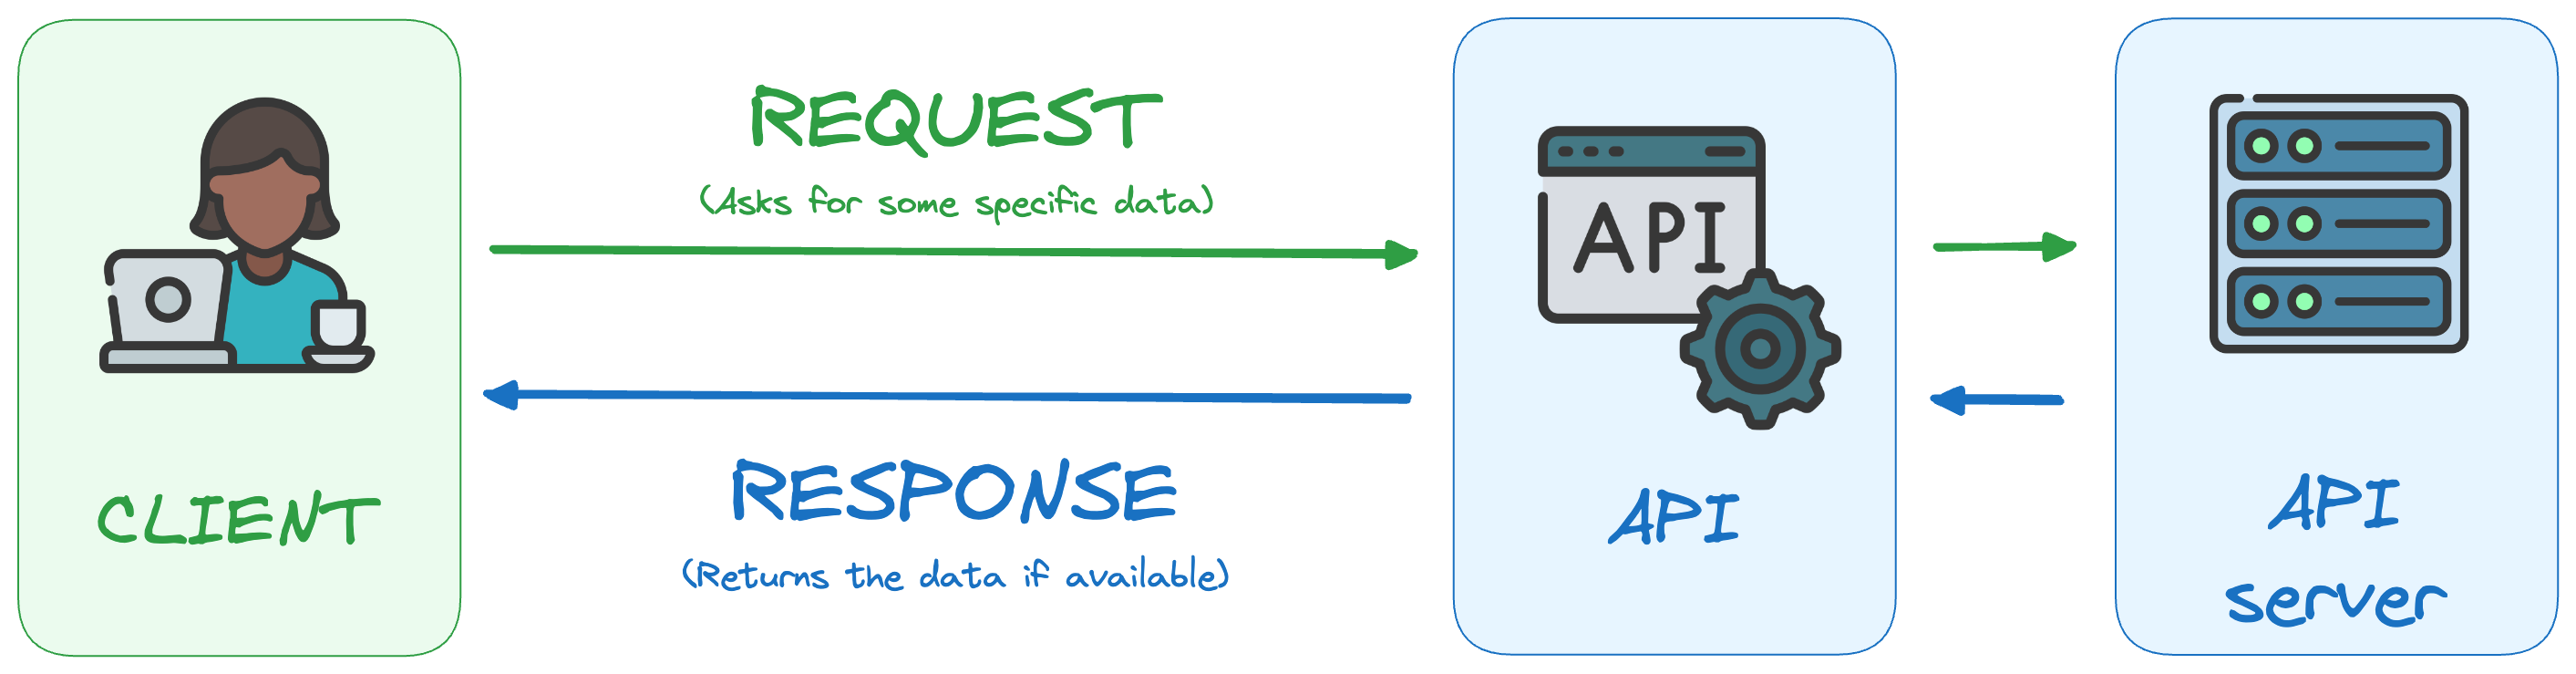

It defines how requests and responses should be formatted, enabling one program to request specific data or services from another.
For example, when you use an app to check the weather, the app uses an API to retrieve data from a weather service.

*In essence, APIs act as intermediaries, making it easier for developers to integrate different software systems.*

In Python, we typically interact with APIs using the `requests` library, which allows us to send HTTP requests (e.g., GET, POST) to API endpoints and handle the responses.

## Why Use APIs for Data Collection?
APIs offer several advantages for data collection:​
- **Efficiency:** They provide direct access to data, eliminating the need for manual data gathering.​
- **Real-time Access:** APIs often deliver up-to-date information, which is essential for time-sensitive analyses.​
- **Automation:** They enable automated data retrieval processes, reducing human intervention and potential errors.​
- **Scalability:** APIs can handle large volumes of requests, making them suitable for extensive data collection tasks.

## EXAMPLE 1: USING THE RANDOM USER API

### STEP 1 - Import the Library

In [ ]:
# Import the libraries
import requests
import pandas as pd

### STEP 2 - Check the documentation page
Before making any requests, it's important to understand how the API works. This includes reviewing available endpoints, parameters, and response structure. Start by visiting the [Random User API documentation](https://randomuser.me/documentation).

### STEP 3 - Define the API Endpoint and Parameters:
Based on the documentation, we can construct a simple request. In this example, we fetch user data limited to users from the United States:

In [ ]:
url = 'https://randomuser.me/api/'
params = {'nat': 'us'}

### STEP 4 - Make the GET Request:
Use the `requests.get()` function with the URL and parameters:

In [ ]:
response = requests.get(url, params=params)

### STEP 5 - Handle the Response:
Check whether the request was successful, then process the data:

In [ ]:
if response.status_code == 200:
    data = response.json()
    # Process the data as needed
else:
    print(f"Error: {response.status_code}")

### STEP 6 - Convert our data into a dataframe
To work with the data easily, we can convert it into a pandas DataFrame:

In [ ]:
data["results"]

[{'gender': 'male',
  'name': {'title': 'Mr', 'first': 'Leo', 'last': 'Boyd'},
  'location': {'street': {'number': 5034, 'name': 'Camden Ave'},
   'city': 'Des Moines',
   'state': 'Oregon',
   'country': 'United States',
   'postcode': 61296,
   'coordinates': {'latitude': '39.3646', 'longitude': '-54.0961'},
   'timezone': {'offset': '0:00',
    'description': 'Western Europe Time, London, Lisbon, Casablanca'}},
  'email': 'leo.boyd@example.com',
  'login': {'uuid': '917813b9-5f79-4cb0-8f49-c26056d03acf',
   'username': 'crazymeercat828',
   'password': 'zeppelin',
   'salt': 't8CLXRat',
   'md5': '7b52d94d0757098c2f2855b0b690a5bf',
   'sha1': '0247e6330cd1bf26157e8e8cab2bd8ef8ce46f71',
   'sha256': 'd1aea3498742c874304f827e5313f1505dc67f5ddaeedf3dc9fbb9ca179e784b'},
  'dob': {'date': '1952-08-28T18:40:17.178Z', 'age': 72},
  'registered': {'date': '2010-05-31T11:51:15.314Z', 'age': 14},
  'phone': '(438) 226-7925',
  'cell': '(797) 767-3856',
  'id': {'name': 'SSN', 'value': '110-82

In [ ]:
data = response.json()
df = pd.json_normalize(data["results"])
df

,gender,email,phone,cell,nat,name.title,name.first,name.last,location.street.number,location.street.name,...,login.sha256,dob.date,dob.age,registered.date,registered.age,id.name,id.value,picture.large,picture.medium,picture.thumbnail
0,male,leo.boyd@example.com,(438) 226-7925,(797) 767-3856,US,Mr,Leo,Boyd,5034,Camden Ave,...,d1aea3498742c874304f827e5313f1505dc67f5ddaeedf...,1952-08-28T18:40:17.178Z,72,2010-05-31T11:51:15.314Z,14,SSN,110-82-0706,https://randomuser.me/api/portraits/men/1.jpg,https://randomuser.me/api/portraits/med/men/1.jpg,https://randomuser.me/api/portraits/thumb/men/...


Now, let’s exemplify it with a real case.

# EXAMPLE II: Working with the EUROSTATS API.
Eurostat is the statistical office of the European Union. It provides high-quality, harmonized statistics on a wide range of topics such as economics, demographics, environment, industry, and tourism—covering all EU member states.

**Our goal today is generate an API call to EUROSTATS, get some data from it and generate a CSV file with it so we can work with it.** 🎯

## STEP 0: UNDERSTAND THE DATA CONTAINED IN EUROSTATS
If you go check the Data section of EUROSTATS, you will find a navigation tree as follows.

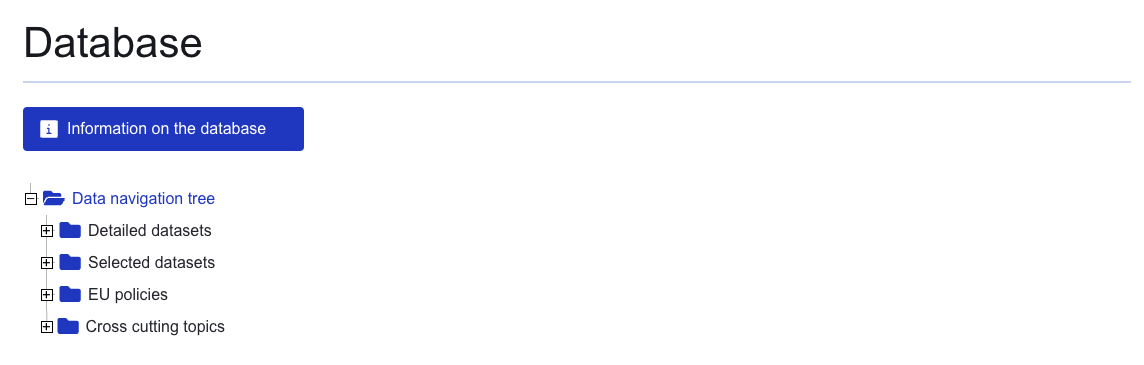


We can try to identify some data of interest in the following subsections:

- **Detailed Datasets:** Contains all data publicly available from Eurostat. They are presented in so-called multi-dimensional datasets.
- **Selected Datasets:** Offers a selection of Eurostat data offering less indicators and variables than the detailed datasets. Data are presented in 2 or 3 dimensional tables.
- **EU policies:** Presents datasets organised according to specific EU policies.
- **Cross-cutting:** Offers a selection of statistical topics that are obtained from different data sources and collections.




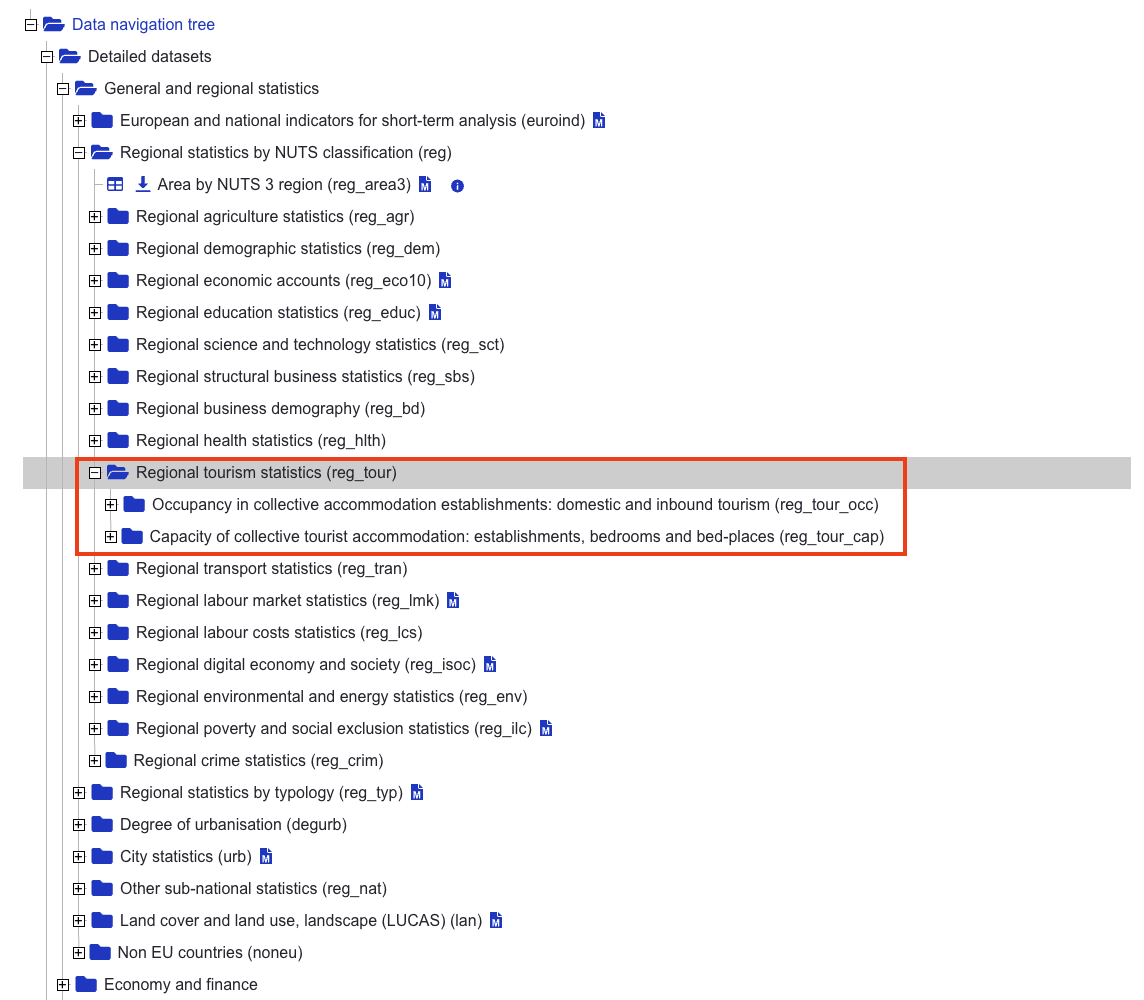


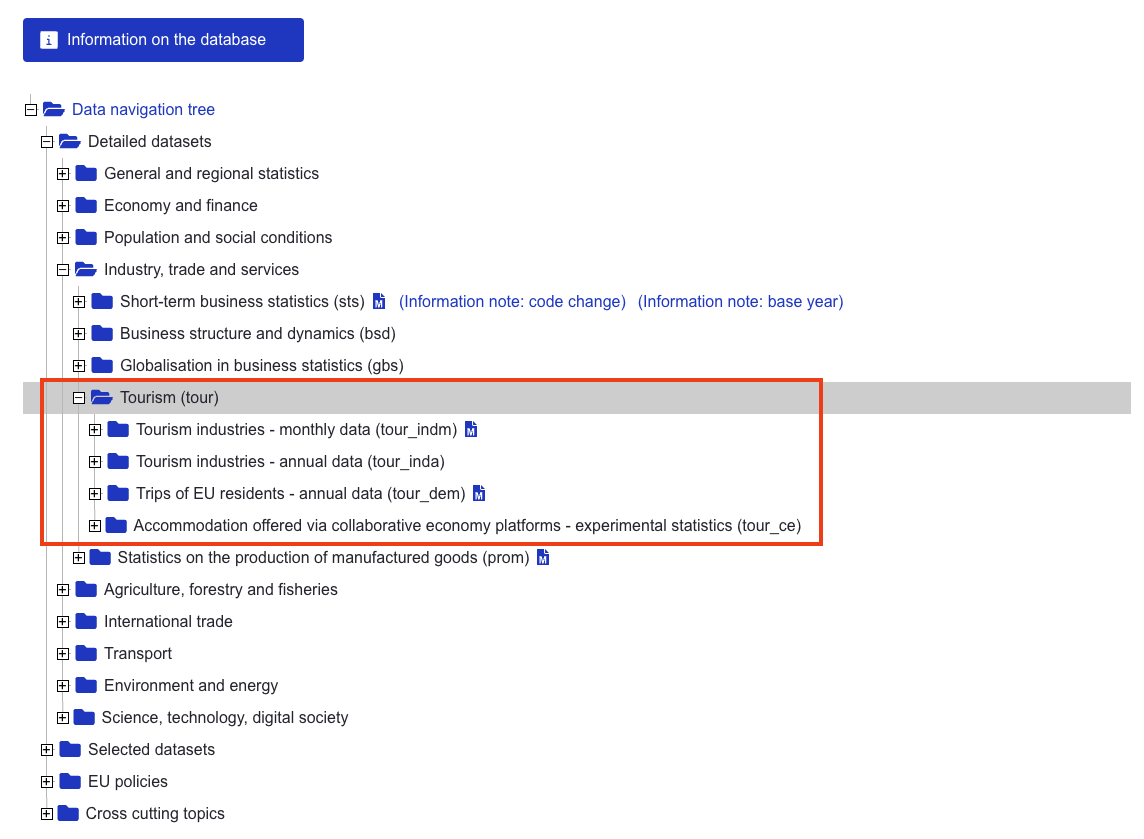

## STEP 1: CHECKING ITS DOCUMENTATION
The first step is going to the [EUROSTATS API documentation](https://wikis.ec.europa.eu/display/EUROSTATHELP/API+-+Getting+started+with+statistics+API) and checking it out.

## STEP 2: GENERATING THE FIRST CALL REQUEST

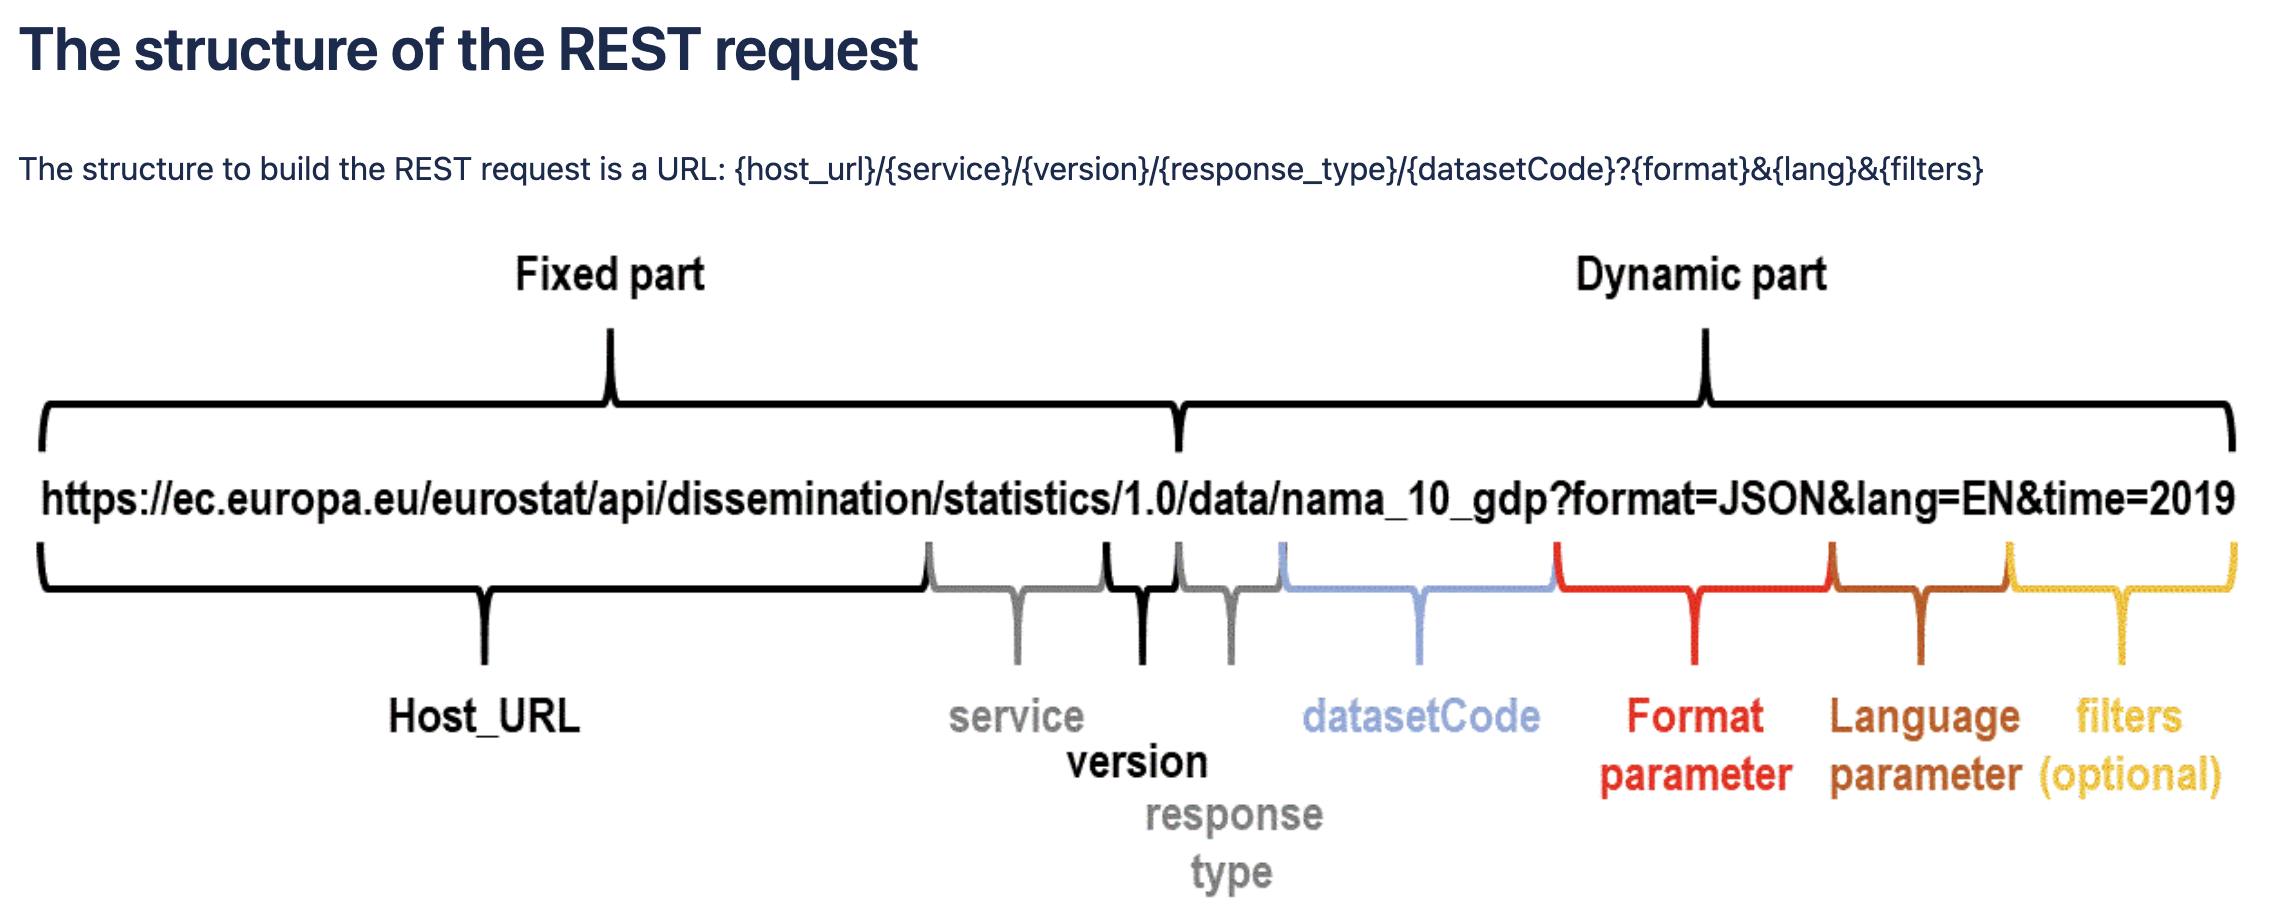



To generate an API request using Python, the first step is installing and importing the requests library. Remember we already installed it in the beginning of the hands-on.

In [ ]:
# We import the requests library
import requests

# Define the URL endpoint -> We use the demo URL in the EUROSTATS API documentation.
url = "https://ec.europa.eu/eurostat/api/dissemination/statistics/1.0/data/DEMO_R_D3DENS?lang=EN"


# Make the GET request
response = requests.get(url)

# Print the status code and response data
print(f"Status Code: {response.status_code}")
#print(response.json())  # Print the JSON response

Status Code: 200


We can split the URL into the base URL and parameters, to make it easier to understant what data are we requesting from the API.

In [ ]:
# We import the requests library
import requests

# Define the URL endpoint -> We use the demo URL in the EUROSTATS API documentation.
url = "https://ec.europa.eu/eurostat/api/dissemination/statistics/1.0/data/DEMO_R_D3DENS"

# Define the parameters -> We define the parameters to add in the URL.
params = {
    'lang': 'EN'  # Specify the language as English
}

# Make the GET request
response = requests.get(url, params=params)

# Print the status code and response data
print(f"Status Code: {response.status_code}")

Status Code: 200


## STEP 3: DETERMINING WHAT DATASET TO CALL

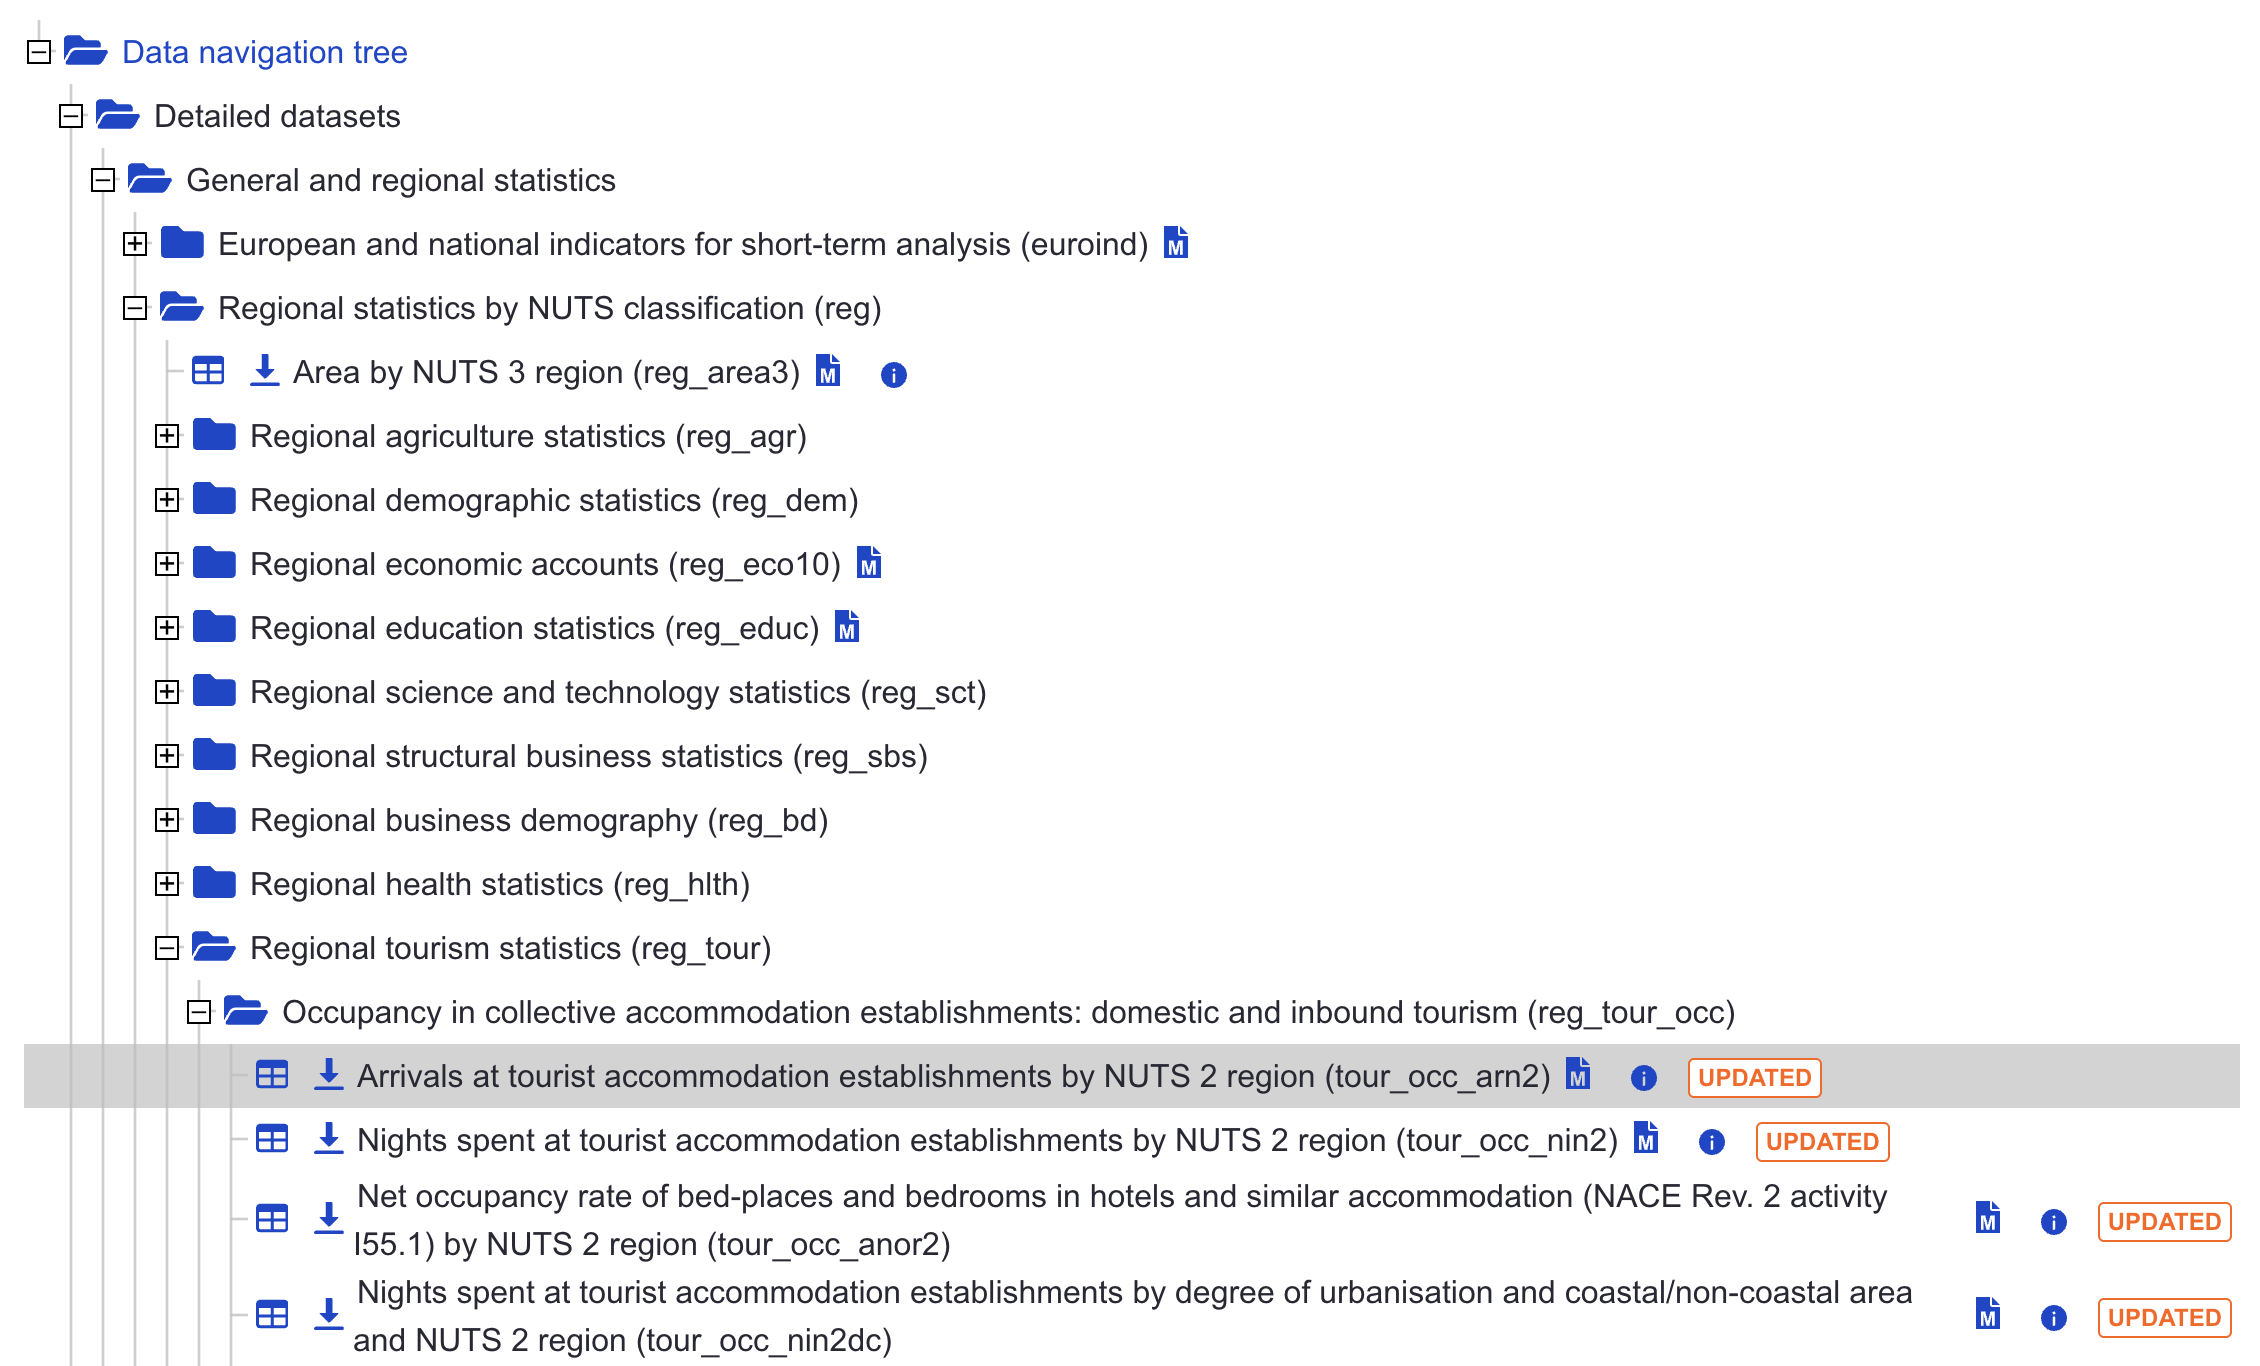

Now instead of using the example endpoint, we can choose the TOUR_OCC_ARN2 dataset and get it directly using a simple API request.

In [ ]:
# We import the requests library
import requests

# Define the URL endpoint -> We use the demo URL in the EUROSTATS API documentation.
base_url = "https://ec.europa.eu/eurostat/api/dissemination/statistics/1.0/data/"
dataset = "TOUR_OCC_ARN2"

url = base_url + dataset
# Define the parameters -> We define the parameters to add in the URL.
params = {
    'lang': 'EN'  # Specify the language as English
}

# Make the GET request -> we generate the request and obtain the response
response = requests.get(url, params=params)

# Print the status code and response data
print(f"Status Code: {response.status_code}")
#print(response.json())  # Print the JSON response

Status Code: 200


If instead of choosing a dataset that exists, we make a typo or define a dataset that does not exist, the API will return an error.

In [ ]:
# We import the requests library
import requests

# Define the URL endpoint -> We use a dataset that does not exist.
base_url = "https://ec.europa.eu/eurostat/api/dissemination/statistics/1.0/data/"
dataset = "tourism"

url = base_url + dataset
# Define the parameters -> We define the parameters to add in the URL.
params = {
    'lang': 'EN'  # Specify the language as English
}

# Make the GET request -> we generate the request and obtain the response
response = requests.get(url, params=params)

# Print the status code and response data
print(f"Status Code: {response.status_code}")
#print(response.json())  # Print the JSON response

Status Code: 404


**What are the status code?**
When generating an API request, we obtain in the response a status code that gives information about the process and whether it was succesful or not.

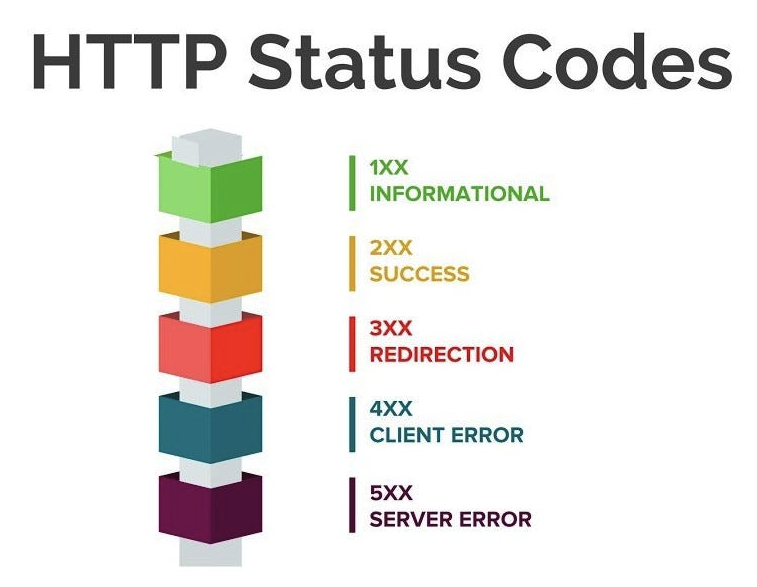

## STEP 4: UNDERSTANDING THE RESPONSE
APIs usually respond data in a JSON format, in the case of EUROSTATS, it is formatted into a JSON-stat. We can first save the JSON and check its structure to understand it better.


In [ ]:
import requests
import json

# Define the URL endpoint and dataset
base_url = "https://ec.europa.eu/eurostat/api/dissemination/statistics/1.0/data/"
dataset = "TOUR_OCC_ARN2"

url = base_url + dataset

# Define the parameters to add in the URL
params = {
    'lang': 'EN',
    "time": 2019  # Specify the language as English
}

# Make the GET request and obtain the response
response = requests.get(url, params=params)

# Check the status code and handle the response
if response.status_code == 200:
    # Parse the JSON response
    data = response.json()

    # Generate a JSON file and write the response data into it
    with open("eurostat_response.json", "w") as json_file:
        json.dump(data, json_file, indent=4)  # Save JSON with pretty formatting

    print("JSON file 'eurostat_response.json' has been successfully created.")
else:
    print(f"Error: Received status code {response.status_code} from the API.")

JSON file 'eurostat_response.json' has been successfully created.


Let's try to see what dimensions and values we are getting.

In [ ]:
import requests

# Step 1: Make the GET request to the Eurostat API
base_url = "https://ec.europa.eu/eurostat/api/dissemination/statistics/1.0/data/"
dataset = "TOUR_OCC_ARN2"  # Tourist accommodation statistics dataset
url = base_url + dataset
params = {'lang': 'EN'}  # Request data in English

# Make the API request
response = requests.get(url, params=params)

# Step 2: Parse the JSON response
data = response.json()

# Step 3: Check the dimensions of the response
print("Response structure preview:")
for key in data.get('dimension', {}).keys():
    print(f"- {key}")

# Step 4: Extract the year field
# In Eurostat data, 'dimension' often contains time-related info
year_info = data.get('dimension', {}).get('time', {}).get('category', {}).get('index', {})
print("\nYear Field Information:")
print(year_info)

# Step 5: Extract the region
# In Eurostat data, 'dimension' often contains geo info
geo_info = data.get('dimension', {}).get('geo', {}).get('category', {}).get('label', {})
print("\nRegional Information:")
#print(geo_info)

Response structure preview:
- freq
- c_resid
- unit
- nace_r2
- geo
- time

Year Field Information:
{'1990': 0, '1991': 1, '1992': 2, '1993': 3, '1994': 4, '1995': 5, '1996': 6, '1997': 7, '1998': 8, '1999': 9, '2000': 10, '2001': 11, '2002': 12, '2003': 13, '2004': 14, '2005': 15, '2006': 16, '2007': 17, '2008': 18, '2009': 19, '2010': 20, '2011': 21, '2012': 22, '2013': 23, '2014': 24, '2015': 25, '2016': 26, '2017': 27, '2018': 28, '2019': 29, '2020': 30, '2021': 31, '2022': 32, '2023': 33}

Regional Information:


We can add filters to obtain only the data we are interested in.

In [ ]:
import requests

# Step 1: Make the GET request to the Eurostat API
base_url = "https://ec.europa.eu/eurostat/api/dissemination/statistics/1.0/data/"
dataset = "TOUR_OCC_ARN2"  # Tourist accommodation statistics dataset
url = base_url + dataset
params = {'lang': 'EN',
          "time": 2019}  # Request data in English and only for the year 2019

# Make the API request
response = requests.get(url, params=params)

# Step 2: Parse the JSON response
data = response.json()

# Step 3: Check the structure of the response
print("Response structure preview:")
for key in data.keys():
    print(f"- {key}")

# Step 4: Extract the year field
# In Eurostat data, 'dimension' often contains time-related info
year_info = data.get('dimension', {}).get('time', {}).get('category', {}).get('index', {})
print("\nYear Field Information:")
print(year_info)

# Step 5: Extract the region
# In Eurostat data, 'dimension' often contains geo info
geo_info = data.get('dimension', {}).get('geo', {}).get('category', {}).get('label', {})
print("\nRegional Information:")
#print(geo_info)



Response structure preview:
- version
- class
- label
- source
- updated
- value
- status
- id
- size
- dimension
- extension

Year Field Information:
{'2019': 0}

Regional Information:


In [ ]:
import requests

# Step 1: Make the GET request to the Eurostat API
base_url = "https://ec.europa.eu/eurostat/api/dissemination/statistics/1.0/data/"
dataset = "TOUR_OCC_ARN2"  # Tourist accommodation statistics dataset
url = base_url + dataset

params = {'lang': 'EN',
          "time": 2019,
          "geo": "BE2" }  # Request data in English and only for the year 2019

# Make the API request
response = requests.get(url, params=params)

# Step 2: Parse the JSON response
data = response.json()

# Step 3: Check the structure of the response
print("Response structure preview:")
for key in data.keys():
    print(f"- {key}")

# Step 4: Extract the year field
# In Eurostat data, 'dimension' often contains time-related info
year_info = data.get('dimension', {}).get('time', {}).get('category', {}).get('index', {})
print("\nYear Field Information:")
print(year_info)

# Step 5: Extract the region
# In Eurostat data, 'dimension' often contains geo info
geo_info = data.get('dimension', {}).get('geo', {}).get('category', {}).get('label', {})
print("\nRegional Information:")
print(geo_info)



Response structure preview:
- version
- class
- label
- source
- updated
- value
- id
- size
- dimension
- extension

Year Field Information:
{'2019': 0}

Regional Information:
{'BE2': 'Vlaams Gewest'}


So now that we have a response, how can we deal with it?

## STEP 5: TRANSFORM THE API RESPONSE INTO USABLE DATA (JSON OR CSV)

Now that we got the data, we can find a way to save it up into a tabular format (CSV) in order to smooth the process of analyzing it.


In [ ]:
import requests
import pandas as pd

# Step 1: Make the GET request to the Eurostat API
base_url = "https://ec.europa.eu/eurostat/api/dissemination/statistics/1.0/data/"
dataset = "TOUR_OCC_ARN2"  # Tourist accommodation statistics dataset
url = base_url + dataset
params = {'lang': 'EN'}  # Request data in English

# Make the API request
response = requests.get(url, params=params)

# Step 2: Check if the request was successful
if response.status_code == 200:
    data = response.json()

    # Step 3: Extract the dimensions and metadata
    dimensions = data['dimension']
    dimension_order = data['id']  # ['geo', 'time', 'unit', 'indic', etc.]

    # Extract labels for each dimension dynamically
    dimension_labels = {dim: dimensions[dim]['category']['label'] for dim in dimension_order}

    # Step 4: Determine the size of each dimension
    dimension_sizes = {dim: len(dimensions[dim]['category']['index']) for dim in dimension_order}

    # Step 5: Create a mapping for each index to its respective label
    # For example, if we have 'geo', 'time', 'unit', and 'indic', map each index to the correct label
    index_labels = {
        dim: list(dimension_labels[dim].keys())
        for dim in dimension_order
    }

    # Step 6: Create a list of rows for the CSV
    rows = []
    for key, value in data['value'].items():
        # `key` is a string like '123', we need to break it down into the corresponding labels
        index = int(key)  # Convert string index to integer

        # Calculate the indices for each dimension
        indices = {}
        for dim in reversed(dimension_order):
            dim_index = index % dimension_sizes[dim]
            indices[dim] = index_labels[dim][dim_index]
            index //= dimension_sizes[dim]

        # Construct a row with labels from all dimensions
        row = {f"{dim.capitalize()} Code": indices[dim] for dim in dimension_order}
        row.update({f"{dim.capitalize()} Name": dimension_labels[dim][indices[dim]] for dim in dimension_order})
        row["Value (Tourist Accommodations)"] = value
        rows.append(row)

    # Step 7: Create a DataFrame and save it as CSV
    if rows:
        df = pd.DataFrame(rows)
        csv_filename = "eurostat_tourist_accommodation.csv"
        df.to_csv(csv_filename, index=False)
        print(f"CSV file '{csv_filename}' has been successfully created.")
    else:
        print("No valid data to save as CSV.")
else:
    print(f"Error: Received status code {response.status_code} from the API.")

CSV file 'eurostat_tourist_accommodation.csv' has been successfully created.


## STEP 6 - GENERATE A SPECIFIC VIEW
In our, imagine we just want to keep those records corresponding to Campings, Apartments or Hotels. We can generate a final table with this condition, and obtain a Pandas DataFrame we can work with.

In [ ]:
# Check the unique values in the 'Nace_r2 Name' column
set(df["Nace_r2 Name"])

# List of options to filter
options = ['Camping grounds, recreational vehicle parks and trailer parks',
           'Holiday and other short-stay accommodation',
           'Hotels and similar accommodation']

# Filter the DataFrame based on whether the 'Nace_r2 Name' column values are in the options list
df = df[df["Nace_r2 Name"].isin(options)]
df.head()

,Freq Code,C_resid Code,Unit Code,Nace_r2 Code,Geo Code,Time Code,Freq Name,C_resid Name,Unit Name,Nace_r2 Name,Geo Name,Time Name,Value (Tourist Accommodations)
0,A,DOM,NR,I551,AL,2018,Annual,Domestic country,Number,Hotels and similar accommodation,Albania,2018,420931.0
1,A,DOM,NR,I551,AL,2020,Annual,Domestic country,Number,Hotels and similar accommodation,Albania,2020,349830.0
2,A,DOM,NR,I551,AL,2023,Annual,Domestic country,Number,Hotels and similar accommodation,Albania,2023,866132.0
3,A,DOM,NR,I551,AL0,2018,Annual,Domestic country,Number,Hotels and similar accommodation,Shqipëria,2018,420931.0
4,A,DOM,NR,I551,AL0,2020,Annual,Domestic country,Number,Hotels and similar accommodation,Shqipëria,2020,349830.0
